# LSTM-BI-LSTM-GRU-BI-GRU-RNN-BRNN 
# ALL Optimizers
# Enron Dataset

In [1]:
!pip3 install tensorflow-addons
!pip3 install keras-adabound
!pip3 install adabelief-tf==0.2.0

     |████████████████████████████████| 1.1 MB 5.2 MB/s 
  Created wheel for keras-adabound: filename=keras_adabound-0.6.0-py3-none-any.whl size=6607 sha256=763e209b7469744237ea12427a89a975e60fb84107dcf8be61a6439358a7a6dd
  Stored in directory: /root/.cache/pip/wheels/3e/bf/39/3d95847ef12aa58c15a6cc7a20f4f21ea39fcd52793e1beea0
Successfully built keras-adabound


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Time and counters
from time import perf_counter

# Optimizers
import tensorflow as tf 
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad, Nadam, Adadelta, Adamax, Ftrl
from adabelief_tf import AdaBeliefOptimizer
from keras_adabound import AdaBound

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Lambda, Dense, Embedding, Bidirectional,concatenate
from tensorflow.keras.layers import Dropout, Input,InputLayer, ReLU, LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
# from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#metrics
from sklearn.metrics import f1_score , recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings('ignore')

#Mark Down print
from IPython.display import Markdown, display

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Optimizers and other paths

In [4]:
#paths
ENRON   = "drive/MyDrive/Mahboob/Datasets/Enron/PROCESSED.csv" 
heatmaps   = "drive/MyDrive/Mahboob/Heatmaps/Enron/"
Visuals    = "drive/MyDrive/Mahboob/Visuals/ENRON/"
Comparison = "drive/MyDrive/Mahboob/Comparison/"


adabelief      = "drive/MyDrive/Mahboob/Models/ENRON/ADABELIEF/"
adabound      = "drive/MyDrive/Mahboob/Models/ENRON/ADABOUND/"
adadelta      = "drive/MyDrive/Mahboob/Models/ENRON/ADADELTA/"
adagrad      = "drive/MyDrive/Mahboob/Models/ENRON/ADAGRAD/"
adam      = "drive/MyDrive/Mahboob/Models/ENRON/ADAM/"
adamax      = "drive/MyDrive/Mahboob/Models/ENRON/ADAMAX/"
adamw      = "drive/MyDrive/Mahboob/Models/ENRON/ADAMW/"
amsbound      = "drive/MyDrive/Mahboob/Models/ENRON/AMSBOUND/"
amsgrad      = "drive/MyDrive/Mahboob/Models/ENRON/AMSGRAD/"
ftrl      = "drive/MyDrive/Mahboob/Models/ENRON/FTRL/"
nadam      = "drive/MyDrive/Mahboob/Models/ENRON/NADAM/"
radam      = "drive/MyDrive/Mahboob/Models/ENRON/RADAM/"
rmsprop      = "drive/MyDrive/Mahboob/Models/ENRON/RMSPROP/"
sgd      = "drive/MyDrive/Mahboob/Models/ENRON/SGD/"
sgd_nesterov      = "drive/MyDrive/Mahboob/Models/ENRON/SGD-NESTEROV/"
sgd_momentum      = "drive/MyDrive/Mahboob/Models/ENRON/SGD-MOMENTUM/"

In [5]:
# 1. ALL Optimizer List
# Adam weight decay

AdamW = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)
AMSGrad = Adam(amsgrad=True)
Rectified_Adam = tfa.optimizers.RectifiedAdam(learning_rate=0.001)

SGD_momentum = SGD(momentum=0.9)
Nesterov_SGD_momentum = SGD(momentum=0.9, nesterov=True)
#Adam #Nadam #SGD #RMSprop #Adadelta #Adagrad #Adamax #Ftrl
AdaBelief = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
Adabound = AdaBound(lr=1e-3, final_lr=0.1)
AMSbound = AdaBound(lr=1e-3, final_lr=0.1, amsgrad=True)

Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



In [6]:
# drive.mount("/content/drive", force_remount=True)
import sys
sys.path.append("drive/MyDrive/Mahboob/")
!ls
from utils import *

drive  sample_data
Please check your arguments if you have upgraded adabelief-tf from version 0.0.1.
Modifications to default arguments:
                           eps  weight_decouple    rectify
-----------------------  -----  -----------------  -------------
adabelief-tf=0.0.1       1e-08  Not supported      Not supported
>=0.1.0 (Current 0.2.0)  1e-14  supported          default: True
SGD better than Adam (e.g. CNN for Image Classification)    Adam better than SGD (e.g. Transformer, GAN)
----------------------------------------------------------  ----------------------------------------------
Recommended epsilon = 1e-7                                  Recommended epsilon = 1e-14
For a complete table of recommended hyperparameters, see
https://github.com/juntang-zhuang/Adabelief-Optimizer
You can disable the log message by setting "print_change_log = False", though it is recommended to keep as a reminder.



# Read Data

In [7]:
data = pd.read_csv(ENRON)
# data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
# data.to_csv(ENRON, index=False)

In [8]:
data.head()

,spam,X
0,0,enron methanol meter number follow note gave m...
1,0,january number number attached file hplnol num...
2,0,neon retreat around wonderful time year neon l...
3,1,photoshop window office cheap main trending ab...
4,0,indian spring deal book teco revenue understan...


# Data Splitting

In [9]:
#Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(data.X , data.spam, test_size = 0.2, random_state = 99)
print(f"Training split input: {X_train.shape}")
print(f"Testing split input : {X_test.shape}")
print(f"Training split class: {y_train.shape}")
print(f"Testing split class : {y_test.shape}")

maxLen = len(max(X_train.astype("U"), key=len).split())
print(f"Max length of the sentence in corpus : {maxLen}")

Training split input: (3694,)
Testing split input : (924,)
Training split class: (3694,)
Testing split class : (924,)
Max length of the sentence in corpus : 2523


In [10]:
print(f"Type of X_train : {type(X_train)}")
print(f"Training sample shape: \n{X_train.shape}\n")
x_train = np.array(X_train.copy())
x_train = x_train.astype(str)
print(f"Type of X_train : {type(x_train)} with dtypes : {x_train.dtype}")
print(f"First training sample: \n{x_train[0]}\n")
print(f"Training sample shape: \n{x_train.shape}\n\n")

print(f"Type of X_test : {type(X_test)}")
print(f"First testing sample shape: \n{X_test.shape}\n\n")
x_test = np.array(X_test.copy())
x_test= x_test.astype(str)
print(f"Type of X_test : {type(x_test)} with dtypes : {x_test.dtype}")
print(f"First testing sample: \n{x_test[0]}\n\n")
print(f"Testing sample shape: \n{x_test.shape}\n\n")

print(f"Type of y_train : {type(y_train)}")
print(f"First training label shape: \n{y_train.shape}\n\n")
Y_train = np.array(y_train.copy())
print(f"Type of y_train : {type(Y_train)}")
print(f"First training label : \n{Y_train[0]}\n\n")
print(f"Training label shape: \n{Y_train.shape}\n\n")

print(f"Type of y_test : {type(y_test)}")
print(f"First testing label shape: \n{y_test.shape}\n\n")
Y_test = np.array(y_test.copy())
print(f"Type of y_test : {type(Y_test)}")
print(f"First testing label : \n{Y_test[0]}\n\n")
print(f"Testing label shape: \n{Y_test.shape}\n\n")


Type of X_train : <class 'pandas.core.series.Series'>
Training sample shape: 
(3694,)

Type of X_train : <class 'numpy.ndarray'> with dtypes : <U21137
First training sample: 
enron total thru june number number reflecting number number enron number number iferc agree thanks

Training sample shape: 
(3694,)


Type of X_test : <class 'pandas.core.series.Series'>
First testing sample shape: 
(924,)


Type of X_test : <class 'numpy.ndarray'> with dtypes : <U8551
First testing sample: 
fagott jabbed free cable drudge plenipotentiary spend dahlia crimea homeowner lura moonlit depressive brian pebble pentane haddad decaffeinate celtic immoderate fungi asteroidal transliterate border wizard laminar afterimage ream muffle bluegrass sprawl arrowroot usurpation acquit wily cupboard dante kindred zigzag morel pagan emendable tabular recession sleigh chic monetary algorithm autocrat offertory abrade atchison agreeing milieu chivalrous distal corporeal cutset plaque loudspeaker shaken saloonkeep tri

# ***Data set Processing***
1. Vocabulary creation 
2. Tokenization
3. Text to sequence / word to vector
4. Padding to max length
5. Implement sequence/index to word

In [11]:
"""
Input text Processing
steps : 

1. Vocabulary creation 
2. Tokenization
3. Text to sequence / word to vector
4. Padding to max length
5. Implement sequence/index to word
"""

# reference : https://www.kaggle.com/anirudhchandnani/ann-vs-lstm-vs-bi-lstm-on-nlp
#ANN

Train_data = x_train.copy()
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)
tokenizer.word_index.keys()

Vocabulary Size : 32662


dict_keys(['number', 'enron', 'deal', 'money', 'mailid', 'please', 'meter', 'need', 'thanks', 'daren', 'corp', 'volume', 'know', 'price', 'company', 'http', 'mmbtu', 'forwarded', 'information', 'change', 'contract', 'would', 'time', 'month', 'farmer', 'message', 'sale', 'robert', 'mail', 'attached', 'ticket', 'question', 'email', 'sitara', 'service', 'energy', 'also', 'sent', 'production', 'call', 'texas', 'nomination', 'report', 'product', 'want', 'order', 'business', 'following', 'system', 'font', 'like', 'flow', 'make', 'well', 'could', 'contact', 'back', 'work', 'statement', 'list', 'take', 'stock', 'delivery', 'day', 'purchase', 'file', 'mary', 'line', 'nbsp', 'year', 'help', 'first', 'original', 'today', 'gary', 'week', 'free', 'daily', 'forward', 'effective', 'issue', 'july', 'rate', 'customer', 'security', 'height', 'march', 'april', 'group', 'click', 'name', 'america', 'melissa', 'vance', 'office', 'agreement', 'market', 'george', 'within', 'point', 'offer', 'fuel', 'north', '

In [12]:
# Index to word Function dict
idx_to_word = dict(map(reversed, tokenizer.word_index.items()))
print(f"length of word to index : {len(word_index)}")
print(f"length of index to word : {len(idx_to_word)}")

length of word to index : 32661
length of index to word : 32661


In [13]:
x_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen = 2000, padding="post")
x_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen = 2000, padding="post")

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

print(f"Training : {type(x_train)}")
print(f"Testing: {type(x_test)}")

Training X Shape: (3694, 2000)
Testing X Shape: (924, 2000)
Training : <class 'numpy.ndarray'>
Testing: <class 'numpy.ndarray'>


In [14]:
#The first 5 training samples
for i in range(5):
  print(x_train[i],"\n")

[  2 136 285 ...   0   0   0] 

[  2 257 168 ...   0   0   0] 

[42  1  1 ...  0  0  0] 

[1288   14 2401 ...    0    0    0] 

[ 680 4525    8 ...    0    0    0] 



In [15]:
## some config values 
embed_size = 50 # how big is each word vector
max_feature = vocab_size # how many unique words to use (i.e num rows in embedding vector)
max_len = 2000 # max number of words in a question to use

# Model Training

In [16]:
def Model_Train(arc_func, optim_func):
  model = arc_func(maxLength=max_len, maxFeature= max_feature, embedding_vecor_length= embed_size)
  model.compile(optimizer=optim_func, loss='binary_crossentropy', metrics=['accuracy',])
  start = perf_counter()
  history = model.fit(x_train, Y_train, batch_size=512, epochs=10, validation_split=0.2)
  duration = perf_counter() - start
  duration = round(duration,2)

  # Predicting the Test set results
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5)
  y_pred = np.array(y_pred)

  test_loss, test_acc = model.evaluate(x_test, Y_test)
  test_err = 100 - test_acc*100

  print(f"Test Loss:     {test_loss*100} %")
  print(f"Test Accuracy: {test_acc*100}  %")
  print(f"Test error: {test_err}  %")

  return model, history, duration, y_pred, test_loss

In [17]:
Optimizer_list = ["Adam", "Nadam", "SGD", "RMSProp", "Adagrad", "Adadelta", "Ftrl", "SGD-Momentum", "SGD-Nesterov-Momentum", "Adam-Weight-Decay"] 

Optimizer_function_list = [Adam(), Nadam(), SGD(), RMSprop(), Adagrad(), Adadelta(), Ftrl(), SGD(momentum=0.9), SGD(momentum=0.9, nesterov=True), tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.001)]


Model_Architectures = {
    "BRNN" : BI_RNN_ARCHITECTURE,
    "Bi-LSTM" : BI_LSTM_ARCHITECTURE,
    "Bi-GRU" : BI_GRU_ARCHITECTURE
}

Deliverables = {
    "Optimizer_history" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []
    },
    "Models" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Duration" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Y_pred" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
    "Test_Loss" : {
          "BRNN" : [],
          "Bi-LSTM" : [],
          "Bi-GRU" : []        
    },
}



# **GPU Support**

In [18]:
# """
# GPU support
# """
# #' ' means CPU whereas '/device:G:0' means GPU

# tf.test.gpu_device_name()

In [19]:
# # memory footprint support libraries/code
# !ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
# !pip install gputil
# !pip install psutil
# !pip install humanize
# import psutil
# import humanize
# import os
# import GPUtil as GPU
# GPUs = GPU.getGPUs()
# # XXX: only one GPU on Colab and isn’t guaranteed
# gpu = GPUs[0]
# def printm():
#  process = psutil.Process(os.getpid())
#  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
#  print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
# printm() 

In [20]:
# !kill -9 -1
# kill the machine

In [21]:
# %tensorflow_version 2.x
# import tensorflow as tf
# import timeit

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#   raise SystemError('GPU device not found')

# def cpu():
#   with tf.device('/cpu:0'):
#     random_image_cpu = tf.random.normal((100, 100, 100, 3))
#     net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
#     return tf.math.reduce_sum(net_cpu)

# def gpu():
#   with tf.device('/device:GPU:0'):
#     random_image_gpu = tf.random.normal((100, 100, 100, 3))
#     net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
#     return tf.math.reduce_sum(net_gpu)
  
# # We run each op once to warm up; see: https://stackoverflow.com/a/45067900
# cpu()
# gpu()

# # Run the op several times.
# print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
#       '(batch x height x width x channel). Sum of ten runs.')
# print('CPU (s):')
# cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
# print(cpu_time)
# print('GPU (s):')
# gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
# print(gpu_time)
# print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

# BRNN - Bi-LSTM - Bi-GRU
## Adam, Nadam, SGD, RMSprop, Adagrad, Adadelta, Ftrl, SGD momentum, SGD Nesterov Momentum, Adamw 

In [22]:
for k,v in enumerate(Model_Architectures.items()):
  for j in Optimizer_function_list:
    print(f"{k} : {v} , optimizer : {j}")
    model, history, duration, y_pred, test_loss = Model_Train(v[1],j)
    Deliverables["Optimizer_history"][v[0]].append(history)
    Deliverables["Models"][v[0]].append(model)
    Deliverables["Duration"][v[0]].append(duration)
    Deliverables["Y_pred"][v[0]].append(y_pred)
    Deliverables["Test_Loss"][v[0]].append(test_loss)
    print("done training")

0 : ('BRNN', <function BI_RNN_ARCHITECTURE at 0x7f21f07f59e0>) , optimizer : <keras.optimizer_v2.adam.Adam object at 0x7f21f03b4890>
Epoch 1/10
6/6 [==============================] - 14s 2s/step - loss: 0.6437 - accuracy: 0.6315 - val_loss: 0.6173 - val_accuracy: 0.6685
Epoch 2/10
6/6 [==============================] - 12s 2s/step - loss: 0.5574 - accuracy: 0.6907 - val_loss: 0.5545 - val_accuracy: 0.6685
Epoch 3/10
6/6 [==============================] - 12s 2s/step - loss: 0.4692 - accuracy: 0.7330 - val_loss: 0.5114 - val_accuracy: 0.6847
Epoch 4/10
6/6 [==============================] - 12s 2s/step - loss: 0.3897 - accuracy: 0.8937 - val_loss: 0.3987 - val_accuracy: 0.8714
Epoch 5/10
6/6 [==============================] - 12s 2s/step - loss: 0.2954 - accuracy: 0.9638 - val_loss: 0.3491 - val_accuracy: 0.8606
Epoch 6/10
6/6 [==============================] - 12s 2s/step - loss: 0.1891 - accuracy: 0.9770 - val_loss: 0.2185 - val_accuracy: 0.9391
Epoch 7/10
6/6 [=======================

# Model comparison table with metrics : 
1. Accuracy
  - Train Accuracy from history object
  - Test Accuracy from get_Metrics Function in utils
2. Loss
  - Train loss curve From history object
  - Test loss From Model Evaluation  
3. Precision, Recall, F1 score
4. ROC AUC

In [24]:
"""
Model comparison table with metrics : 
1. Accuracy
2. Loss
3. Error
4. Precision, Recall, F1 score
5. ROC AUC
"""
Model_comparison = dict()

for k,v in enumerate(Model_Architectures.items()):
  for index_of_optim, i in enumerate(Optimizer_list):
    # print(v[0])
    history_curr = Deliverables["Optimizer_history"][v[0]][index_of_optim]
    acc_train = history_curr.history["accuracy"][len(history_curr.history["accuracy"])-1]
    
    y_pred = Deliverables["Y_pred"][v[0]][index_of_optim]
    
    loss_test = Deliverables["Test_Loss"][v[0]][index_of_optim]
    
    duration = Deliverables["Duration"][v[0]][index_of_optim]
    
    precision, recall, f1_score_, acc_test, auc_ = get_Metrics(Y_test, y_pred)
    
    Model_comparison[f"{v[0]} {i}"] = { 
        "Train_acc":acc_train, 
        "Test_acc":acc_test, 
        "Test_loss" : loss_test, 
        "auroc":auc_, 
        "f1_score":f1_score_, 
        "precision":precision, 
        "recall":recall,  
        "duration": duration 
        }
    print(f"{v[0]} {i} done")    

BRNN Adam done
BRNN Nadam done
BRNN SGD done
BRNN RMSProp done
BRNN Adagrad done
BRNN Adadelta done
BRNN Ftrl done
BRNN SGD-Momentum done
BRNN SGD-Nesterov-Momentum done
BRNN Adam-Weight-Decay done
Bi-LSTM Adam done
Bi-LSTM Nadam done
Bi-LSTM SGD done
Bi-LSTM RMSProp done
Bi-LSTM Adagrad done
Bi-LSTM Adadelta done
Bi-LSTM Ftrl done
Bi-LSTM SGD-Momentum done
Bi-LSTM SGD-Nesterov-Momentum done
Bi-LSTM Adam-Weight-Decay done
Bi-GRU Adam done
Bi-GRU Nadam done
Bi-GRU SGD done
Bi-GRU RMSProp done
Bi-GRU Adagrad done
Bi-GRU Adadelta done
Bi-GRU Ftrl done
Bi-GRU SGD-Momentum done
Bi-GRU SGD-Nesterov-Momentum done
Bi-GRU Adam-Weight-Decay done


In [41]:
import re
models_metrics = []
BRNN_metrics = []
BILSTM_metrics = []
BIGRU_metrics = []
ALL = [models_metrics, BRNN_metrics, BILSTM_metrics, BIGRU_metrics] 
ALL_names = ["Enron_comparison", "Enron_BRNN_comparison", "Enron_Bi-LSTM_comparison", "Enron_Bi-GRU_comparison"]

for name, model in Model_comparison.items():
  precision, recall, f1_score_,  = model["precision"], model["recall"], model["f1_score"]
  Test_acc, auc_, Test_loss = model["Test_acc"], model["auroc"], model["Test_loss"],
  Train_acc, duration = model["Train_acc"], model["duration"]
  models_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^BRNN*", name):
    BRNN_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^Bi-LSTM*", name):
    BILSTM_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])
  if re.match(r"^Bi-GRU*", name):
    BIGRU_metrics.append([name, precision, recall, f1_score_, Train_acc, Test_acc, Test_loss, auc_, duration])

for i,j in zip(ALL, ALL_names):
  df_metrics = pd.DataFrame(i)
  df_metrics.columns = ['Model', 'Precision', 'Recall', 'f1 score', "Train Accuracy", 'Test Accuracy', 'Loss', 'ROC-AUC', 'Train Time (s)']
  df_metrics.sort_values(by = 'Test Accuracy', ascending = False, inplace=True)
  df_metrics.reset_index(drop = True, inplace=True)
  df_metrics.to_csv(f"{Comparison}{j}.csv")

In [42]:
import pprint
pprint.pprint(Model_comparison)

{'BRNN Adadelta': {'Test_acc': 0.6904761904761905,
                   'Test_loss': 0.6508070826530457,
                   'Train_acc': 0.6852791905403137,
                   'auroc': 0.49921752738654146,
                   'duration': 136.52,
                   'f1_score': 0.40845070422535207,
                   'precision': 0.3456121343445287,
                   'recall': 0.49921752738654146},
 'BRNN Adagrad': {'Test_acc': 0.6915584415584416,
                  'Test_loss': 0.6337398290634155,
                  'Train_acc': 0.6842639446258545,
                  'auroc': 0.5,
                  'duration': 133.34,
                  'f1_score': 0.4088291746641075,
                  'precision': 0.3457792207792208,
                  'recall': 0.5},
 'BRNN Adam': {'Test_acc': 0.9112554112554112,
               'Test_loss': 0.28192341327667236,
               'Train_acc': 0.9275803565979004,
               'auroc': 0.8726628778519067,
               'duration': 123.45,
               'f1_sco

In [43]:
df_metrics

,Model,Precision,Recall,f1 score,Train Accuracy,Test Accuracy,Loss,ROC-AUC,Train Time (s)
0,Bi-GRU Nadam,0.975974,0.965481,0.970506,0.998308,0.975108,0.114984,0.965481,444.84
1,Bi-GRU RMSProp,0.969593,0.966831,0.968196,0.993232,0.972944,0.094542,0.966831,447.24
2,Bi-GRU Adam-Weight-Decay,0.963004,0.952796,0.957682,0.997631,0.964286,0.119048,0.952796,724.03
3,Bi-GRU Adam,0.957862,0.927856,0.941067,0.996278,0.951299,0.138371,0.927856,440.59
4,Bi-GRU SGD,0.345779,0.500000,0.408829,0.687648,0.691558,0.648052,0.500000,445.00
5,Bi-GRU Adagrad,0.595987,0.500972,0.412197,0.687648,0.691558,0.689946,0.500972,706.84
6,Bi-GRU Ftrl,0.345779,0.500000,0.408829,0.687648,0.691558,0.690840,0.500000,746.34
7,Bi-GRU SGD-Momentum,0.345779,0.500000,0.408829,0.687648,0.691558,0.616737,0.500000,745.69
8,Bi-GRU SGD-Nesterov-Momentum,0.345779,0.500000,0.408829,0.687648,0.691558,0.617335,0.500000,736.84
9,Bi-GRU Adadelta,0.522199,0.520171,0.425219,0.436548,0.426407,0.694252,0.520171,777.27


# Save the model objects for graph

In [29]:
import pickle
with open(f"{Visuals}Enron_history.pkl", "wb") as open_file:
    pickle.dump(Deliverables["Optimizer_history"], open_file)
with open(f"{Visuals}Enron_y_pred.pkl", "wb") as open_file:
    pickle.dump(Deliverables["Y_pred"], open_file)

INFO:tensorflow:Assets written to: ram://8dbf39c6-67d1-4136-b724-f629392fd1b1/assets
INFO:tensorflow:Assets written to: ram://c4704079-f803-4e1f-aa8c-941ce3891de5/assets
INFO:tensorflow:Assets written to: ram://396f701c-8bcc-4570-aed3-3f37649ad68f/assets
INFO:tensorflow:Assets written to: ram://1e976708-06d0-46c1-a4e6-6baffb140768/assets
INFO:tensorflow:Assets written to: ram://8feab998-5a38-4697-831e-b1eed0e65b1d/assets
INFO:tensorflow:Assets written to: ram://9a4065af-9393-46a3-8391-295e2bb3d854/assets
INFO:tensorflow:Assets written to: ram://ef440317-b63c-4b00-87d4-30a666eca71a/assets
INFO:tensorflow:Assets written to: ram://3d76c66f-99b4-4365-8530-d8425617bfde/assets
INFO:tensorflow:Assets written to: ram://9ab6c8dc-f4f5-4585-8a23-889b91f77161/assets
INFO:tensorflow:Assets written to: ram://9fd87dbe-fe5f-49ce-a97a-2123229f0b26/assets


INFO:tensorflow:Assets written to: ram://8cc0f360-aef7-492b-b650-a6740910a0d8/assets


INFO:tensorflow:Assets written to: ram://8cc0f360-aef7-492b-b650-a6740910a0d8/assets


INFO:tensorflow:Assets written to: ram://faa62bef-a86b-4660-8ce3-bc434d29c98e/assets


INFO:tensorflow:Assets written to: ram://faa62bef-a86b-4660-8ce3-bc434d29c98e/assets


INFO:tensorflow:Assets written to: ram://36fdffad-3f3f-47c1-a936-205fcd41b4c6/assets


INFO:tensorflow:Assets written to: ram://36fdffad-3f3f-47c1-a936-205fcd41b4c6/assets


INFO:tensorflow:Assets written to: ram://94ed03bc-5dd8-4159-839c-23abf2b1e0a7/assets


INFO:tensorflow:Assets written to: ram://94ed03bc-5dd8-4159-839c-23abf2b1e0a7/assets


INFO:tensorflow:Assets written to: ram://0acde0b6-6ecd-4f31-97ff-929f60cbba26/assets


INFO:tensorflow:Assets written to: ram://0acde0b6-6ecd-4f31-97ff-929f60cbba26/assets


INFO:tensorflow:Assets written to: ram://66da66e1-b359-4dd7-848f-671e214aa362/assets


INFO:tensorflow:Assets written to: ram://66da66e1-b359-4dd7-848f-671e214aa362/assets


INFO:tensorflow:Assets written to: ram://4ab26881-0a98-4b76-bf62-0ab36e994baf/assets


INFO:tensorflow:Assets written to: ram://4ab26881-0a98-4b76-bf62-0ab36e994baf/assets


INFO:tensorflow:Assets written to: ram://a7269fa9-7809-491a-b06e-c02c09f4cf3d/assets


INFO:tensorflow:Assets written to: ram://a7269fa9-7809-491a-b06e-c02c09f4cf3d/assets


INFO:tensorflow:Assets written to: ram://be9d3b70-9f12-45ec-98f7-82ef8b251c7b/assets


INFO:tensorflow:Assets written to: ram://be9d3b70-9f12-45ec-98f7-82ef8b251c7b/assets


INFO:tensorflow:Assets written to: ram://9e594ebc-d0d3-45e6-a492-ce6380f436b6/assets


INFO:tensorflow:Assets written to: ram://9e594ebc-d0d3-45e6-a492-ce6380f436b6/assets


INFO:tensorflow:Assets written to: ram://1615d556-e1e8-4ad0-a282-98f121e1b5a8/assets


INFO:tensorflow:Assets written to: ram://1615d556-e1e8-4ad0-a282-98f121e1b5a8/assets


INFO:tensorflow:Assets written to: ram://914137f0-127f-4bd4-a7e9-e396d01832a5/assets


INFO:tensorflow:Assets written to: ram://914137f0-127f-4bd4-a7e9-e396d01832a5/assets


INFO:tensorflow:Assets written to: ram://ce8d7edc-da89-4b6c-bff8-f4ad066e5526/assets


INFO:tensorflow:Assets written to: ram://ce8d7edc-da89-4b6c-bff8-f4ad066e5526/assets


INFO:tensorflow:Assets written to: ram://a6cdeccb-a596-4b30-8dbc-4a887192d66b/assets


INFO:tensorflow:Assets written to: ram://a6cdeccb-a596-4b30-8dbc-4a887192d66b/assets


INFO:tensorflow:Assets written to: ram://fb79829c-1bf7-4889-bcfd-a6bced127116/assets


INFO:tensorflow:Assets written to: ram://fb79829c-1bf7-4889-bcfd-a6bced127116/assets


INFO:tensorflow:Assets written to: ram://152ee147-63c6-48c2-a39f-bd9f53f91204/assets


INFO:tensorflow:Assets written to: ram://152ee147-63c6-48c2-a39f-bd9f53f91204/assets


INFO:tensorflow:Assets written to: ram://e9515082-d101-4863-9c20-a2fe3768e043/assets


INFO:tensorflow:Assets written to: ram://e9515082-d101-4863-9c20-a2fe3768e043/assets


INFO:tensorflow:Assets written to: ram://79da9cd5-d7a2-48d7-9523-882054cefc8a/assets


INFO:tensorflow:Assets written to: ram://79da9cd5-d7a2-48d7-9523-882054cefc8a/assets


INFO:tensorflow:Assets written to: ram://f682304a-0be6-4176-8ab5-bfc20bdc42f5/assets


INFO:tensorflow:Assets written to: ram://f682304a-0be6-4176-8ab5-bfc20bdc42f5/assets


INFO:tensorflow:Assets written to: ram://0e5a379b-c365-4568-abc3-b314031809db/assets


INFO:tensorflow:Assets written to: ram://0e5a379b-c365-4568-abc3-b314031809db/assets


In [32]:
with open(f"{Visuals}Enron.pkl", "wb") as open_file:
    pickle.dump(Deliverables, open_file)

INFO:tensorflow:Assets written to: ram://d93cf109-d656-443d-8f95-1527a2aa0d15/assets


INFO:tensorflow:Assets written to: ram://d93cf109-d656-443d-8f95-1527a2aa0d15/assets


INFO:tensorflow:Assets written to: ram://eee2a575-fcc8-4f46-b188-daeb5b8bda97/assets


INFO:tensorflow:Assets written to: ram://eee2a575-fcc8-4f46-b188-daeb5b8bda97/assets


INFO:tensorflow:Assets written to: ram://7d1de806-9fd7-4963-b4eb-a1040f76a0ae/assets


INFO:tensorflow:Assets written to: ram://7d1de806-9fd7-4963-b4eb-a1040f76a0ae/assets


INFO:tensorflow:Assets written to: ram://6e8ae904-830e-4ee1-90da-e762b7fe7ba7/assets


INFO:tensorflow:Assets written to: ram://6e8ae904-830e-4ee1-90da-e762b7fe7ba7/assets


INFO:tensorflow:Assets written to: ram://13a27c65-effd-44ac-bc28-3f819d680dbc/assets


INFO:tensorflow:Assets written to: ram://13a27c65-effd-44ac-bc28-3f819d680dbc/assets


INFO:tensorflow:Assets written to: ram://b012ff48-38f1-4189-a3d1-07f5ee654992/assets


INFO:tensorflow:Assets written to: ram://b012ff48-38f1-4189-a3d1-07f5ee654992/assets


INFO:tensorflow:Assets written to: ram://94e1267f-b0ec-4bca-b22a-68919a369f0f/assets


INFO:tensorflow:Assets written to: ram://94e1267f-b0ec-4bca-b22a-68919a369f0f/assets


INFO:tensorflow:Assets written to: ram://22dbfe77-02f6-4fef-8aca-2fa315d61ae5/assets


INFO:tensorflow:Assets written to: ram://22dbfe77-02f6-4fef-8aca-2fa315d61ae5/assets


INFO:tensorflow:Assets written to: ram://02d4d1a8-5f91-4760-80c6-854bfc0d4f6e/assets


INFO:tensorflow:Assets written to: ram://02d4d1a8-5f91-4760-80c6-854bfc0d4f6e/assets


INFO:tensorflow:Assets written to: ram://22e25dd6-6a0f-43a3-993e-924c1da78950/assets


INFO:tensorflow:Assets written to: ram://22e25dd6-6a0f-43a3-993e-924c1da78950/assets


INFO:tensorflow:Assets written to: ram://634ac79f-9912-4aab-abae-4c5bd709225a/assets


INFO:tensorflow:Assets written to: ram://634ac79f-9912-4aab-abae-4c5bd709225a/assets


INFO:tensorflow:Assets written to: ram://6352fbe1-2713-4ee2-be52-243df4f1a7af/assets


INFO:tensorflow:Assets written to: ram://6352fbe1-2713-4ee2-be52-243df4f1a7af/assets


INFO:tensorflow:Assets written to: ram://30a9e979-c4ef-4bb3-9484-d8cb90a73dcb/assets


INFO:tensorflow:Assets written to: ram://30a9e979-c4ef-4bb3-9484-d8cb90a73dcb/assets


INFO:tensorflow:Assets written to: ram://b646341a-0a6c-4374-875b-c295c9f3f510/assets


INFO:tensorflow:Assets written to: ram://b646341a-0a6c-4374-875b-c295c9f3f510/assets


INFO:tensorflow:Assets written to: ram://e97ecb89-3f1d-409e-8340-f21e2e436d60/assets


INFO:tensorflow:Assets written to: ram://e97ecb89-3f1d-409e-8340-f21e2e436d60/assets


INFO:tensorflow:Assets written to: ram://258c154c-e334-4460-be10-6a1262cf1c45/assets


INFO:tensorflow:Assets written to: ram://258c154c-e334-4460-be10-6a1262cf1c45/assets


INFO:tensorflow:Assets written to: ram://d8479885-32f7-40c0-a16d-e7ac4d5cc8f4/assets


INFO:tensorflow:Assets written to: ram://d8479885-32f7-40c0-a16d-e7ac4d5cc8f4/assets


INFO:tensorflow:Assets written to: ram://7c252a65-b563-413a-9724-48b4f4c22697/assets


INFO:tensorflow:Assets written to: ram://7c252a65-b563-413a-9724-48b4f4c22697/assets


INFO:tensorflow:Assets written to: ram://07b496c1-b85a-4014-9eb7-105f19dd2e5d/assets


INFO:tensorflow:Assets written to: ram://07b496c1-b85a-4014-9eb7-105f19dd2e5d/assets


INFO:tensorflow:Assets written to: ram://8e66e4a6-7f7f-41b5-ae9e-ae080c90f0cf/assets


INFO:tensorflow:Assets written to: ram://8e66e4a6-7f7f-41b5-ae9e-ae080c90f0cf/assets


INFO:tensorflow:Assets written to: ram://f6114c2e-53ac-4e33-9bff-b47616ababa3/assets


INFO:tensorflow:Assets written to: ram://f6114c2e-53ac-4e33-9bff-b47616ababa3/assets


INFO:tensorflow:Assets written to: ram://35555cff-ab31-4e9e-8a33-e0a4fde338a9/assets


INFO:tensorflow:Assets written to: ram://35555cff-ab31-4e9e-8a33-e0a4fde338a9/assets


INFO:tensorflow:Assets written to: ram://930b4808-0024-4c96-8b02-13e043a691c6/assets


INFO:tensorflow:Assets written to: ram://930b4808-0024-4c96-8b02-13e043a691c6/assets


INFO:tensorflow:Assets written to: ram://1af5d621-8875-4a36-8018-ea291aad27cb/assets


INFO:tensorflow:Assets written to: ram://1af5d621-8875-4a36-8018-ea291aad27cb/assets


INFO:tensorflow:Assets written to: ram://49702638-4018-4048-8927-ca5686c44ed6/assets


INFO:tensorflow:Assets written to: ram://49702638-4018-4048-8927-ca5686c44ed6/assets


INFO:tensorflow:Assets written to: ram://d95ce86a-c8ed-47f9-9984-bdf034490d9a/assets


INFO:tensorflow:Assets written to: ram://d95ce86a-c8ed-47f9-9984-bdf034490d9a/assets


INFO:tensorflow:Assets written to: ram://0f34974d-ade0-4fb8-8ed1-6e8734ef0bf7/assets


INFO:tensorflow:Assets written to: ram://0f34974d-ade0-4fb8-8ed1-6e8734ef0bf7/assets


INFO:tensorflow:Assets written to: ram://5ad37cde-4e6f-4c44-8908-cbe012a2c53d/assets


INFO:tensorflow:Assets written to: ram://5ad37cde-4e6f-4c44-8908-cbe012a2c53d/assets


INFO:tensorflow:Assets written to: ram://2940404c-e8c0-4aea-b6a0-6a48e630d8c1/assets


INFO:tensorflow:Assets written to: ram://2940404c-e8c0-4aea-b6a0-6a48e630d8c1/assets


INFO:tensorflow:Assets written to: ram://35743f79-0dbf-4450-9fae-9da335c4a311/assets


INFO:tensorflow:Assets written to: ram://35743f79-0dbf-4450-9fae-9da335c4a311/assets


# Curves
1. Enron 
  - Train Loss, Val Loss,
  - Train Acc, Val Acc

2. 3 model, 10 optimizers - 30 

3. BRNN - 10 opt, 4 curves
4. Bi-LSTM - 10 opt, 4 curves
5. Bi-GRU - 10 opt, 4 curves 


BRNN [<keras.callbacks.History object at 0x7f21f0187cd0>, <keras.callbacks.History object at 0x7f1ff1012850>, <keras.callbacks.History object at 0x7f1ff0efd9d0>, <keras.callbacks.History object at 0x7f1ff0dfda90>, <keras.callbacks.History object at 0x7f1ff0d78c10>, <keras.callbacks.History object at 0x7f1fe1a92990>, <keras.callbacks.History object at 0x7f1ff0b78890>, <keras.callbacks.History object at 0x7f1ff0a18c50>, <keras.callbacks.History object at 0x7f1ff08cd290>, <keras.callbacks.History object at 0x7f1ff0828b50>]
Bi-LSTM [<keras.callbacks.History object at 0x7f1ff061dad0>, <keras.callbacks.History object at 0x7f1ff03c7e90>, <keras.callbacks.History object at 0x7f1ff01a7fd0>, <keras.callbacks.History object at 0x7f1feffb8a50>, <keras.callbacks.History object at 0x7f1fefd65e10>, <keras.callbacks.History object at 0x7f1fefb21fd0>, <keras.callbacks.History object at 0x7f1fef939510>, <keras.callbacks.History object at 0x7f1fef694990>, <keras.callbacks.History object at 0x7f1fef4a0fd0

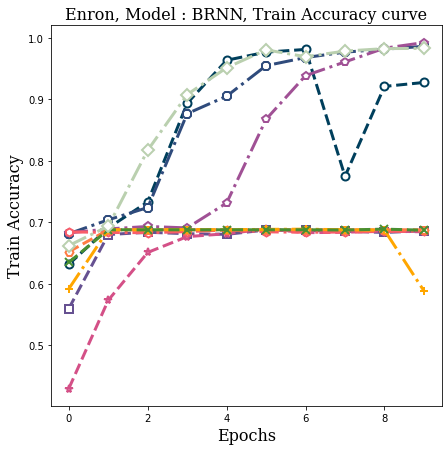

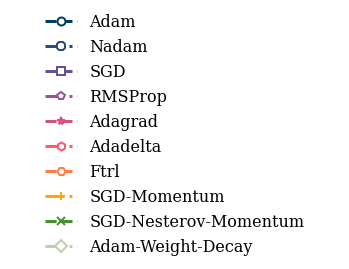

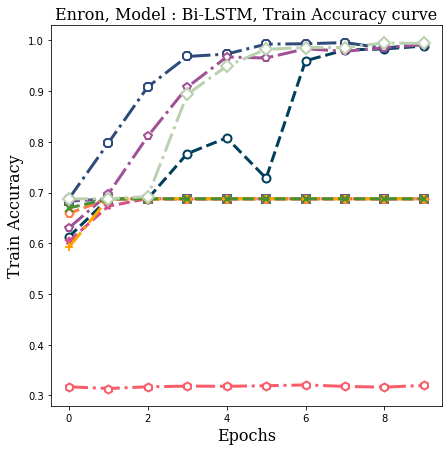

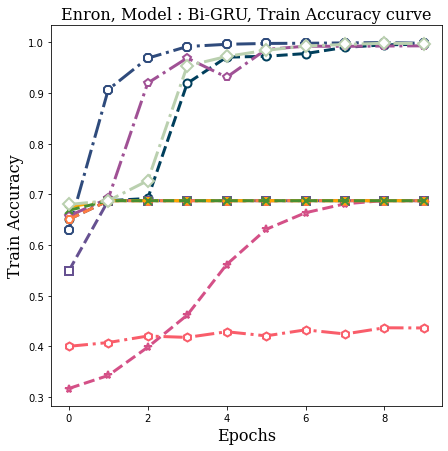

In [44]:
Histories = Deliverables["Optimizer_history"].copy()

col = ['#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#dadaeb','#bcbddc','#9e9ac8','#807dba','#6a51a3']
col_2 = ["#238b45", "#88419d", "#2b8cbe", "#ef6548", "#3690c0", "#df65b0", "#41b6c4", "#6a51a3", "#c7e9b4", "#74a9cf"]
col_3 = ["#003f5c","#2f4b7c","#665191","#a05195","#d45087","#f95d6a","#ff7c43","#ffa600","#488f31","#bad0af"]

from cycler import cycler
import matplotlib.pyplot as plt
custom_cycler = (cycler(color=col_3) +
                 cycler(marker=['o', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D']))

# Global plot parameters
plt.rc('lines', linewidth=3, markerfacecolor='white', markeredgewidth=2, markersize=8, linestyle='--')
plt.rc('axes', prop_cycle=custom_cycler)
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

def plot_metric(metric, history, y_label):

  for k, v in enumerate(history.items()):
    print(v[0],v[1])
    fig, ax = plt.subplots(figsize=(7,7))  # Create a figure and an axes.
    #plot legend handles
    plt_handles = []
    for index_of_optim, i in enumerate(Optimizer_list):
      if index_of_optim % 2 == 0:
        plot_ = ax.plot(history[v[0]][index_of_optim].history[metric], linestyle='--', label=i)
        plt_handles.append(plot_[0])
      else: 
        plot_ = ax.plot(history[v[0]][index_of_optim].history[metric], linestyle='-.', label=i)
        plt_handles.append(plot_[0])
    ax.set_xlabel('Epochs', fontdict=font)  
    ax.set_ylabel(y_label, fontdict=font) 
    ax.set_title(f"Enron, Model : {v[0]}, {y_label} curve", fontdict=font) 
    plt.savefig(f"{Visuals}Accuracy_Loss/Enron_{metric}_{v[0]}.jpeg")
    if k == 0:
      fig_legend = plt.figure()
      plt.legend(handles = plt_handles, loc = 'center', prop={'family': 'serif', 'size': 16}, frameon=False)
      plt.axis("off")
      plt.savefig(f"{Visuals}Accuracy_Loss/Enron_{metric}_{v[0]}_legend.jpeg", bbox_inches='tight')


plot_metric("accuracy", Histories, "Train Accuracy")

BRNN [<keras.callbacks.History object at 0x7f21f0187cd0>, <keras.callbacks.History object at 0x7f1ff1012850>, <keras.callbacks.History object at 0x7f1ff0efd9d0>, <keras.callbacks.History object at 0x7f1ff0dfda90>, <keras.callbacks.History object at 0x7f1ff0d78c10>, <keras.callbacks.History object at 0x7f1fe1a92990>, <keras.callbacks.History object at 0x7f1ff0b78890>, <keras.callbacks.History object at 0x7f1ff0a18c50>, <keras.callbacks.History object at 0x7f1ff08cd290>, <keras.callbacks.History object at 0x7f1ff0828b50>]
Bi-LSTM [<keras.callbacks.History object at 0x7f1ff061dad0>, <keras.callbacks.History object at 0x7f1ff03c7e90>, <keras.callbacks.History object at 0x7f1ff01a7fd0>, <keras.callbacks.History object at 0x7f1feffb8a50>, <keras.callbacks.History object at 0x7f1fefd65e10>, <keras.callbacks.History object at 0x7f1fefb21fd0>, <keras.callbacks.History object at 0x7f1fef939510>, <keras.callbacks.History object at 0x7f1fef694990>, <keras.callbacks.History object at 0x7f1fef4a0fd0

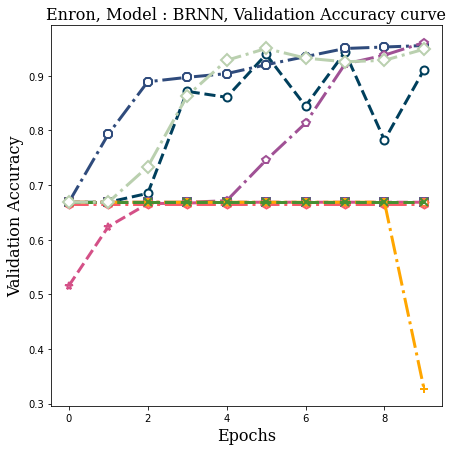

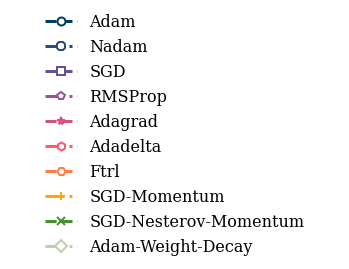

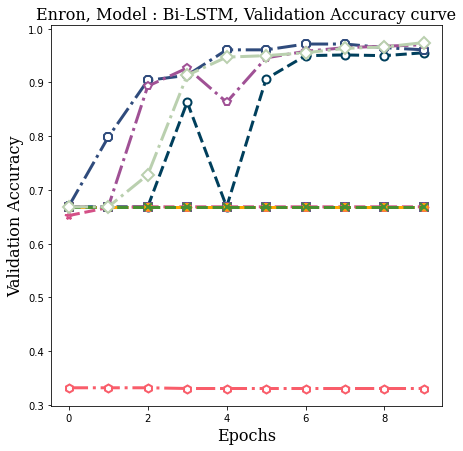

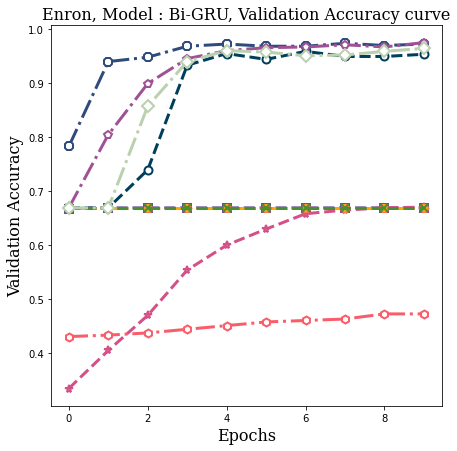

In [45]:
plot_metric("val_accuracy", Histories, "Validation Accuracy")

BRNN [<keras.callbacks.History object at 0x7f21f0187cd0>, <keras.callbacks.History object at 0x7f1ff1012850>, <keras.callbacks.History object at 0x7f1ff0efd9d0>, <keras.callbacks.History object at 0x7f1ff0dfda90>, <keras.callbacks.History object at 0x7f1ff0d78c10>, <keras.callbacks.History object at 0x7f1fe1a92990>, <keras.callbacks.History object at 0x7f1ff0b78890>, <keras.callbacks.History object at 0x7f1ff0a18c50>, <keras.callbacks.History object at 0x7f1ff08cd290>, <keras.callbacks.History object at 0x7f1ff0828b50>]
Bi-LSTM [<keras.callbacks.History object at 0x7f1ff061dad0>, <keras.callbacks.History object at 0x7f1ff03c7e90>, <keras.callbacks.History object at 0x7f1ff01a7fd0>, <keras.callbacks.History object at 0x7f1feffb8a50>, <keras.callbacks.History object at 0x7f1fefd65e10>, <keras.callbacks.History object at 0x7f1fefb21fd0>, <keras.callbacks.History object at 0x7f1fef939510>, <keras.callbacks.History object at 0x7f1fef694990>, <keras.callbacks.History object at 0x7f1fef4a0fd0

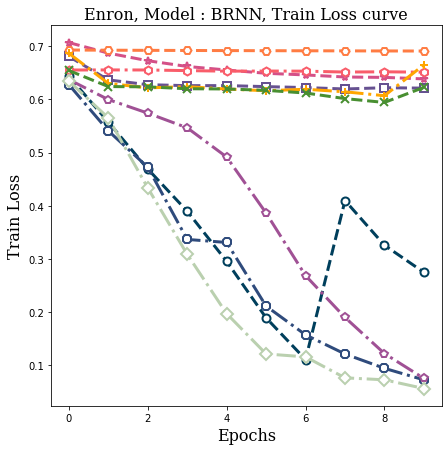

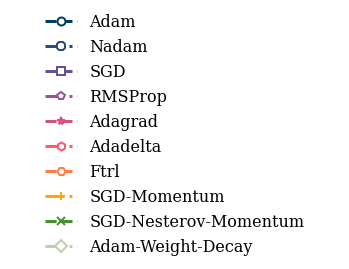

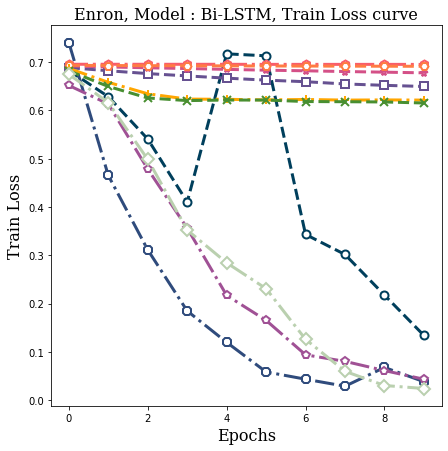

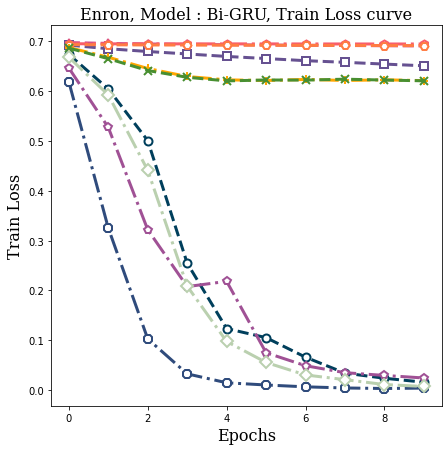

In [46]:
plot_metric("loss", Histories, "Train Loss")

BRNN [<keras.callbacks.History object at 0x7f21f0187cd0>, <keras.callbacks.History object at 0x7f1ff1012850>, <keras.callbacks.History object at 0x7f1ff0efd9d0>, <keras.callbacks.History object at 0x7f1ff0dfda90>, <keras.callbacks.History object at 0x7f1ff0d78c10>, <keras.callbacks.History object at 0x7f1fe1a92990>, <keras.callbacks.History object at 0x7f1ff0b78890>, <keras.callbacks.History object at 0x7f1ff0a18c50>, <keras.callbacks.History object at 0x7f1ff08cd290>, <keras.callbacks.History object at 0x7f1ff0828b50>]
Bi-LSTM [<keras.callbacks.History object at 0x7f1ff061dad0>, <keras.callbacks.History object at 0x7f1ff03c7e90>, <keras.callbacks.History object at 0x7f1ff01a7fd0>, <keras.callbacks.History object at 0x7f1feffb8a50>, <keras.callbacks.History object at 0x7f1fefd65e10>, <keras.callbacks.History object at 0x7f1fefb21fd0>, <keras.callbacks.History object at 0x7f1fef939510>, <keras.callbacks.History object at 0x7f1fef694990>, <keras.callbacks.History object at 0x7f1fef4a0fd0

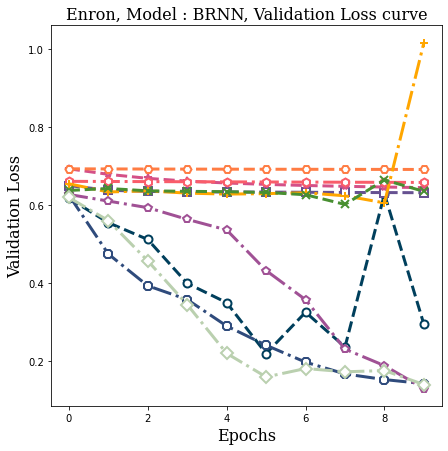

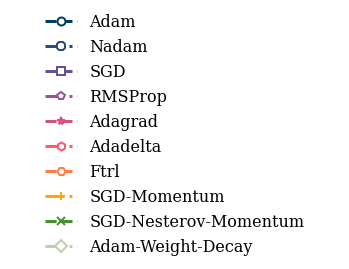

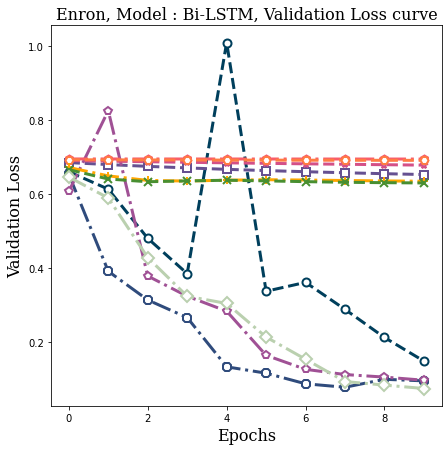

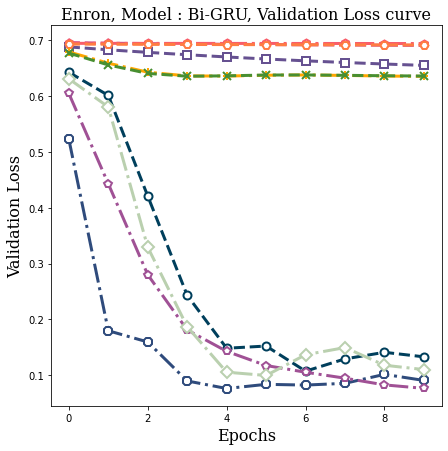

In [47]:
plot_metric("val_loss", Histories, "Validation Loss")

In [48]:
# with open(f"comparison/classifiers/train_test_tf_idf.pkl", "rb") as open_file:
#     dataset_processed = pickle.load(open_file)